1. Importing The Model Building Libraries

In [26]:

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import MaxPooling2D 
from keras.layers import Flatten
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np


 2.Define the parameters /arguments for ImageDataGenerator class

In [27]:
traindatagen = ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)


In [28]:
testdatagen = ImageDataGenerator(rescale=1./255)

3.Applying ImageDataGenerator functionality to trainset and testset

In [29]:
x_train = traindatagen.flow_from_directory('Dataset/train',target_size=(64,64),batch_size=5,color_mode='grayscale',class_mode='categorical')

Found 594 images belonging to 6 classes.


In [30]:
x_test = testdatagen.flow_from_directory('Dataset/test',target_size=(64,64),batch_size=5,color_mode='grayscale',class_mode='categorical')

Found 30 images belonging to 6 classes.


4. Initializing The Model

In [31]:
model = Sequential()


5. Adding CNN Layers

In [32]:
model.add(Conv2D(32, (3, 3), input_shape=(64, 64, 1), activation='relu')) 
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())

6. Adding Dense Layers

In [33]:


model.add(Dense(units=128,activation='relu'))
model.add(Dense(units=6,activation='softmax'))

In [34]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 62, 62, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 6272)              0         
                                                                 
 dense_2 (Dense)             (None, 128)              

7. Configure The Learning Process

In [35]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [36]:

import tensorflow as tf
tf . print(tf. __version__)


2.10.0


8. Train The Model

In [37]:
model.fit_generator(generator=x_train,steps_per_epoch=len(x_train),epochs=20,
validation_data=x_test,validation_steps=len(x_test))

Epoch 1/20


/tmp/ipykernel_70901/1633189495.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(generator=x_train,steps_per_epoch=len(x_train),epochs=20,


119/119 [==============================] - 1s 7ms/step - loss: 1.3736 - accuracy: 0.4259 - val_loss: 0.7573 - val_accuracy: 0.6667
Epoch 2/20
119/119 [==============================] - 1s 7ms/step - loss: 0.6477 - accuracy: 0.7525 - val_loss: 0.7432 - val_accuracy: 0.7667
Epoch 3/20
119/119 [==============================] - 1s 7ms/step - loss: 0.4472 - accuracy: 0.8131 - val_loss: 0.5949 - val_accuracy: 0.8000
Epoch 4/20
119/119 [==============================] - 1s 7ms/step - loss: 0.4017 - accuracy: 0.8519 - val_loss: 0.5183 - val_accuracy: 0.8667
Epoch 5/20
119/119 [==============================] - 1s 6ms/step - loss: 0.2610 - accuracy: 0.8990 - val_loss: 0.4658 - val_accuracy: 0.9000
Epoch 6/20
119/119 [==============================] - 1s 7ms/step - loss: 0.2626 - accuracy: 0.9108 - val_loss: 0.2314 - val_accuracy: 0.9000
Epoch 7/20
119/119 [==============================] - 1s 7ms/step - loss: 0.2177 - accuracy: 0.9226 - val_loss: 0.4094 - val_accuracy: 0.9000
Epoch 8/20
119/11

9. Save The Model

In [38]:
model.save('gesture.h5')

10 . Test The Model

In [39]:
model_json = model.to_json()

In [40]:
with open('model-bw.json',"w") as json_file:
    json_file.write(model_json)

In [41]:
model = load_model('gesture.h5')

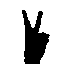

In [42]:
img = image.load_img('Dataset/test/2/3.jpg',grayscale=True,target_size=(64,64))
img

In [43]:

x = image.img_to_array(img)
x = np.expand_dims(x,axis=0)
pred = np.argmax(model.predict(x),axis=1)
pred

1/1 [==============================] - 0s 46ms/step


array([2])

In [44]:
index = ['0','1','2','3','4','5']
res = str(index[pred[0]])
res

'2'